import my libs.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

read el csv

In [34]:
data = pd.read_csv('hotel.csv')

awel 5 cols.

In [35]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/02/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/06/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,02/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,05/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,04/11/2018,Canceled


no3 el data

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

el stats bta3 el data

In [37]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


concat weeknights ma3 weekends

In [38]:
data['total spent days'] = data['number of week nights']+data['number of weekend nights']
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total spent days
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/02/2015,Not_Canceled,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/06/2018,Not_Canceled,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,02/28/2018,Canceled,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,05/20/2017,Canceled,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,04/11/2018,Canceled,3


lma b3ml sort l a3la prices el awal hnla2e en nesbet el cancellation btzeed gdan wel3aks law el price olaiel no cancellation ta2reban

In [39]:
data.sort_values(by='average price ', ascending=False, inplace = True)
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total spent days
33114,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,Offline,0,0,0,540.00,0,03/25/2018,Canceled,1
9461,INN09462,3,0,0,2,Meal Plan 1,0,Room_Type 4,21,Online,0,0,0,375.50,0,12/30/2018,Not_Canceled,2
20900,INN20901,2,1,1,2,Meal Plan 2,0,Room_Type 1,173,Offline,0,0,0,365.00,1,07/25/2018,Canceled,3
34306,INN34307,2,2,0,3,Meal Plan 2,0,Room_Type 6,43,Online,0,0,0,349.63,1,12/29/2018,Not_Canceled,3
14773,INN14774,2,2,0,3,Meal Plan 1,0,Room_Type 6,28,Online,0,0,0,332.57,1,06/02/2018,Not_Canceled,3


In [40]:
data.sort_values(by='average price ', inplace = True)
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total spent days
21822,INN21823,2,0,1,4,Meal Plan 1,1,Room_Type 4,0,Complementary,0,0,0,0.0,1,09/21/2018,Not_Canceled,5
33741,INN33742,1,0,0,1,Meal Plan 1,0,Room_Type 1,5,Complementary,0,0,0,0.0,0,08/24/2018,Not_Canceled,1
33739,INN33740,2,0,0,2,Meal Plan 1,0,Room_Type 4,13,Complementary,0,0,0,0.0,2,02/17/2018,Not_Canceled,2
26947,INN26948,2,0,0,0,Meal Plan 1,0,Room_Type 1,1,Complementary,0,0,0,0.0,0,09/05/2018,Not_Canceled,0
26713,INN26714,1,0,0,0,Meal Plan 1,0,Room_Type 1,176,Online,0,0,0,0.0,0,09/08/2018,Not_Canceled,0


lma el spent dsays btkon aktar el cancellation btzeed

In [41]:
data.sort_values(by='total spent days', ascending=False, inplace = True)
data.head(20)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total spent days
19512,INN19513,2,0,7,17,Meal Plan 1,0,Room_Type 1,188,Online,0,0,0,90.95,1,07/04/2018,Canceled,24
33019,INN33020,1,0,6,17,Meal Plan 1,0,Room_Type 5,2,Corporate,0,0,0,170.00,0,10/19/2018,Canceled,23
16977,INN16978,1,0,6,17,Meal Plan 1,0,Room_Type 1,9,Online,0,0,0,68.23,1,01/28/2018,Not_Canceled,23
34092,INN34093,2,0,6,16,Not Selected,0,Room_Type 1,14,Online,0,0,0,64.05,0,02/03/2018,Canceled,22
19745,INN19746,1,0,6,16,Meal Plan 1,0,Room_Type 4,31,Online,0,0,0,98.93,1,03/03/2018,Canceled,22
17938,INN17939,1,0,6,15,Meal Plan 1,0,Room_Type 1,8,Corporate,0,0,0,130.00,0,04/13/2018,Canceled,21
32322,INN32323,1,0,6,15,Meal Plan 1,0,Room_Type 4,17,Online,0,0,0,103.39,1,02/19/2018,Canceled,21
6929,INN06930,2,0,6,15,Not Selected,0,Room_Type 1,17,Online,0,0,0,75.66,0,12/02/2018,Not_Canceled,21
539,INN00540,1,0,6,15,Meal Plan 1,0,Room_Type 4,12,Online,0,0,0,128.06,0,03/30/2018,Canceled,21
14275,INN14276,1,0,6,14,Meal Plan 1,0,Room_Type 1,29,Online,0,0,0,70.91,0,02/05/2018,Canceled,20


In [42]:
data.sort_values(by='total spent days', ascending=True, inplace = True)
data.head(20)


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total spent days
12027,INN12028,2,0,0,0,Meal Plan 1,0,Room_Type 1,18,Online,0,0,0,0.0,1,11/07/2018,Not_Canceled,0
20266,INN20267,1,0,0,0,Meal Plan 1,0,Room_Type 1,119,Online,0,0,0,0.0,0,06/07/2018,Not_Canceled,0
18204,INN18205,1,0,0,0,Meal Plan 1,0,Room_Type 1,83,Complementary,0,0,0,0.0,1,12/17/2017,Not_Canceled,0
27179,INN27180,2,0,0,0,Not Selected,0,Room_Type 1,11,Online,0,0,0,0.0,1,01/22/2018,Not_Canceled,0
32704,INN32705,1,0,0,0,Meal Plan 1,0,Room_Type 1,83,Complementary,0,0,0,0.0,1,12/17/2017,Not_Canceled,0
26547,INN26548,1,0,0,0,Meal Plan 1,0,Room_Type 1,5,Complementary,0,0,0,0.0,0,12/01/2017,Not_Canceled,0
23612,INN23613,2,0,0,0,Not Selected,0,Room_Type 1,1,Online,0,0,0,0.0,1,01/08/2018,Not_Canceled,0
23084,INN23085,2,2,0,0,Meal Plan 1,0,Room_Type 6,36,Online,0,0,0,0.0,3,07/20/2018,Not_Canceled,0
26713,INN26714,1,0,0,0,Meal Plan 1,0,Room_Type 1,176,Online,0,0,0,0.0,0,09/08/2018,Not_Canceled,0
2472,INN02473,2,0,0,0,Not Selected,0,Room_Type 1,19,Online,0,0,0,0.0,0,12/16/2017,Not_Canceled,0


edene felvisualizations

<Figure size 1000x800 with 0 Axes>

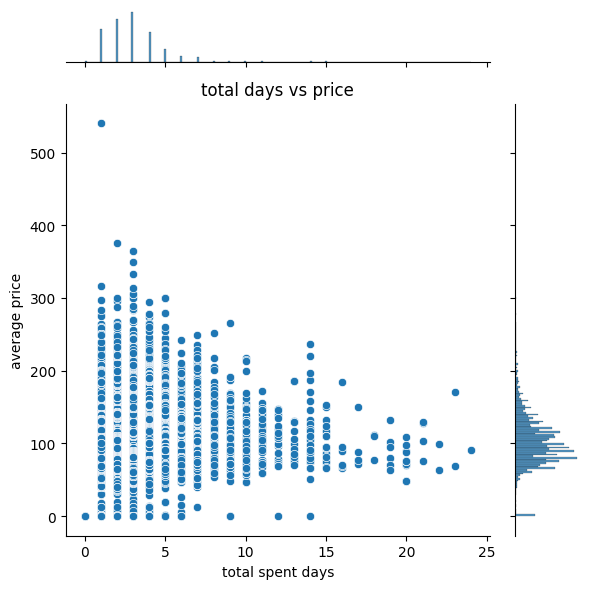

In [43]:
colors = sns.color_palette("coolwarm", len(data['average price ']))

plt.figure(figsize=(10, 8))  # Increase the figure height

sns.jointplot(x='total spent days', y='average price ', data=data, kind = 'scatter' ,palette=colors)

plt.title("total days vs price")
plt.xlabel("total spent days")
plt.ylabel("average price")
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-44-aa3d6303b708>:12: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


<Figure size 3000x2400 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


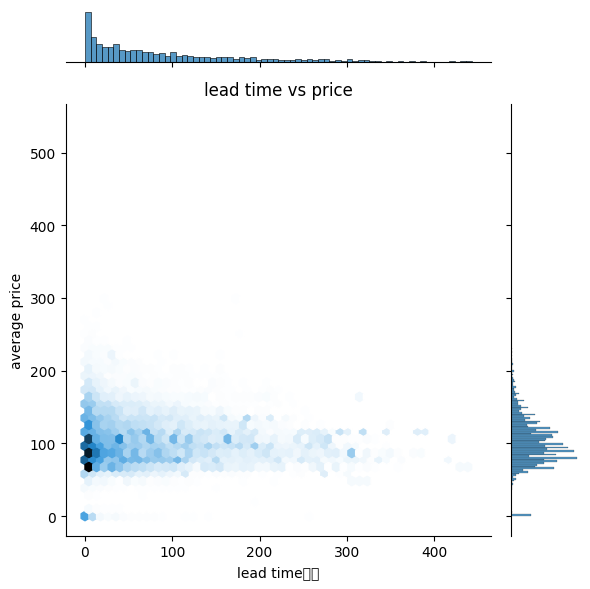

In [44]:
colors = sns.color_palette("coolwarm", len(data['average price ']))

plt.figure(figsize=(30, 24))  # Increase the figure height

sns.jointplot(x='lead time', y='average price ', data=data, kind = 'hex' ,palette=colors)

plt.title("lead time vs price")
plt.xlabel("lead time		")
plt.ylabel("average price")
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Axes: xlabel='special requests', ylabel='average price '>

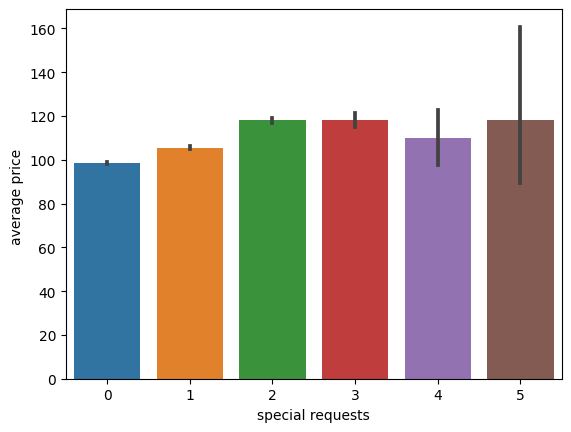

In [45]:
sns.barplot(x=data['special requests'], y=data['average price '])


no nulls aho

In [46]:
print (data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
total spent days            0
dtype: int64


no elduplicates

In [47]:

sum(data.duplicated())

0

nzabat ba2a column el date

In [48]:
data = data[pd.to_datetime(data['date of reservation'], errors='coerce').notna()] # hna shelt ay 7aga hat2refne kda kda m3ana rows kteer mesh moshkla
data['date of reservation'] = pd.to_datetime(data['date of reservation'])  ##to date time format

#yalla mesh hane7remko mn 7aga
data['reservation_year'] = data['date of reservation'].dt.year
data['reservation_month'] = data['date of reservation'].dt.month
data['reservation_day'] = data['date of reservation'].dt.day

#drop original column
data.drop(columns=['date of reservation'], inplace=True)

#hnoramalize eldenia ba2a
scaler = StandardScaler()
data[['reservation_year', 'reservation_month', 'reservation_day']] = scaler.fit_transform(data[['reservation_year', 'reservation_month', 'reservation_day']])





<ipython-input-48-4c196d4014d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date of reservation'] = pd.to_datetime(data['date of reservation'])  ##to date time format
<ipython-input-48-4c196d4014d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reservation_year'] = data['date of reservation'].dt.year
<ipython-input-48-4c196d4014d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

asame el columns ahe kont ba7tagha

In [49]:
data.columns


Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'booking status', 'total spent days', 'reservation_year',
       'reservation_month', 'reservation_day'],
      dtype='object')

encode el booking status balade

In [50]:
data['booking status'] = data['booking status'].replace({"Canceled": 0, "Not_Canceled": 1})
data

<ipython-input-50-4ce207dfeb9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['booking status'] = data['booking status'].replace({"Canceled": 0, "Not_Canceled": 1})


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total spent days,reservation_year,reservation_month,reservation_day
12027,INN12028,2,0,0,0,Meal Plan 1,0,Room_Type 1,18,Online,0,0,0,0.00,1,1,0,0.468012,1.164383,-0.982695
20266,INN20267,1,0,0,0,Meal Plan 1,0,Room_Type 1,119,Online,0,0,0,0.00,0,1,0,0.468012,-0.466108,-0.982695
18204,INN18205,1,0,0,0,Meal Plan 1,0,Room_Type 1,83,Complementary,0,0,0,0.00,1,1,0,-2.133506,1.490481,0.162235
27179,INN27180,2,0,0,0,Not Selected,0,Room_Type 1,11,Online,0,0,0,0.00,1,1,0,0.468012,-2.096598,0.734700
32704,INN32705,1,0,0,0,Meal Plan 1,0,Room_Type 1,83,Complementary,0,0,0,0.00,1,1,0,-2.133506,1.490481,0.162235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,INN19746,1,0,6,16,Meal Plan 1,0,Room_Type 4,31,Online,0,0,0,98.93,1,0,22,0.468012,-1.444402,-1.440667
34092,INN34093,2,0,6,16,Not Selected,0,Room_Type 1,14,Online,0,0,0,64.05,0,0,22,0.468012,-1.770500,-1.440667
16977,INN16978,1,0,6,17,Meal Plan 1,0,Room_Type 1,9,Online,0,0,0,68.23,1,1,23,0.468012,-2.096598,1.421658
33019,INN33020,1,0,6,17,Meal Plan 1,0,Room_Type 5,2,Corporate,0,0,0,170.00,0,0,23,0.468012,0.838285,0.391221



encode type of meal w booking ID using label encoder    

In [51]:
label_encoder = LabelEncoder()
data['type of meal'] = label_encoder.fit_transform(data['type of meal'])

In [52]:
label_encoder = LabelEncoder()
data['Booking_ID'] = label_encoder.fit_transform(data['Booking_ID'])

encode market segment type w room type b one hot eencoder

In [53]:
data = pd.get_dummies(data, columns=['market segment type', 'room type'])

feature selection b correlation w b3den kbest w ba3den reomove columns

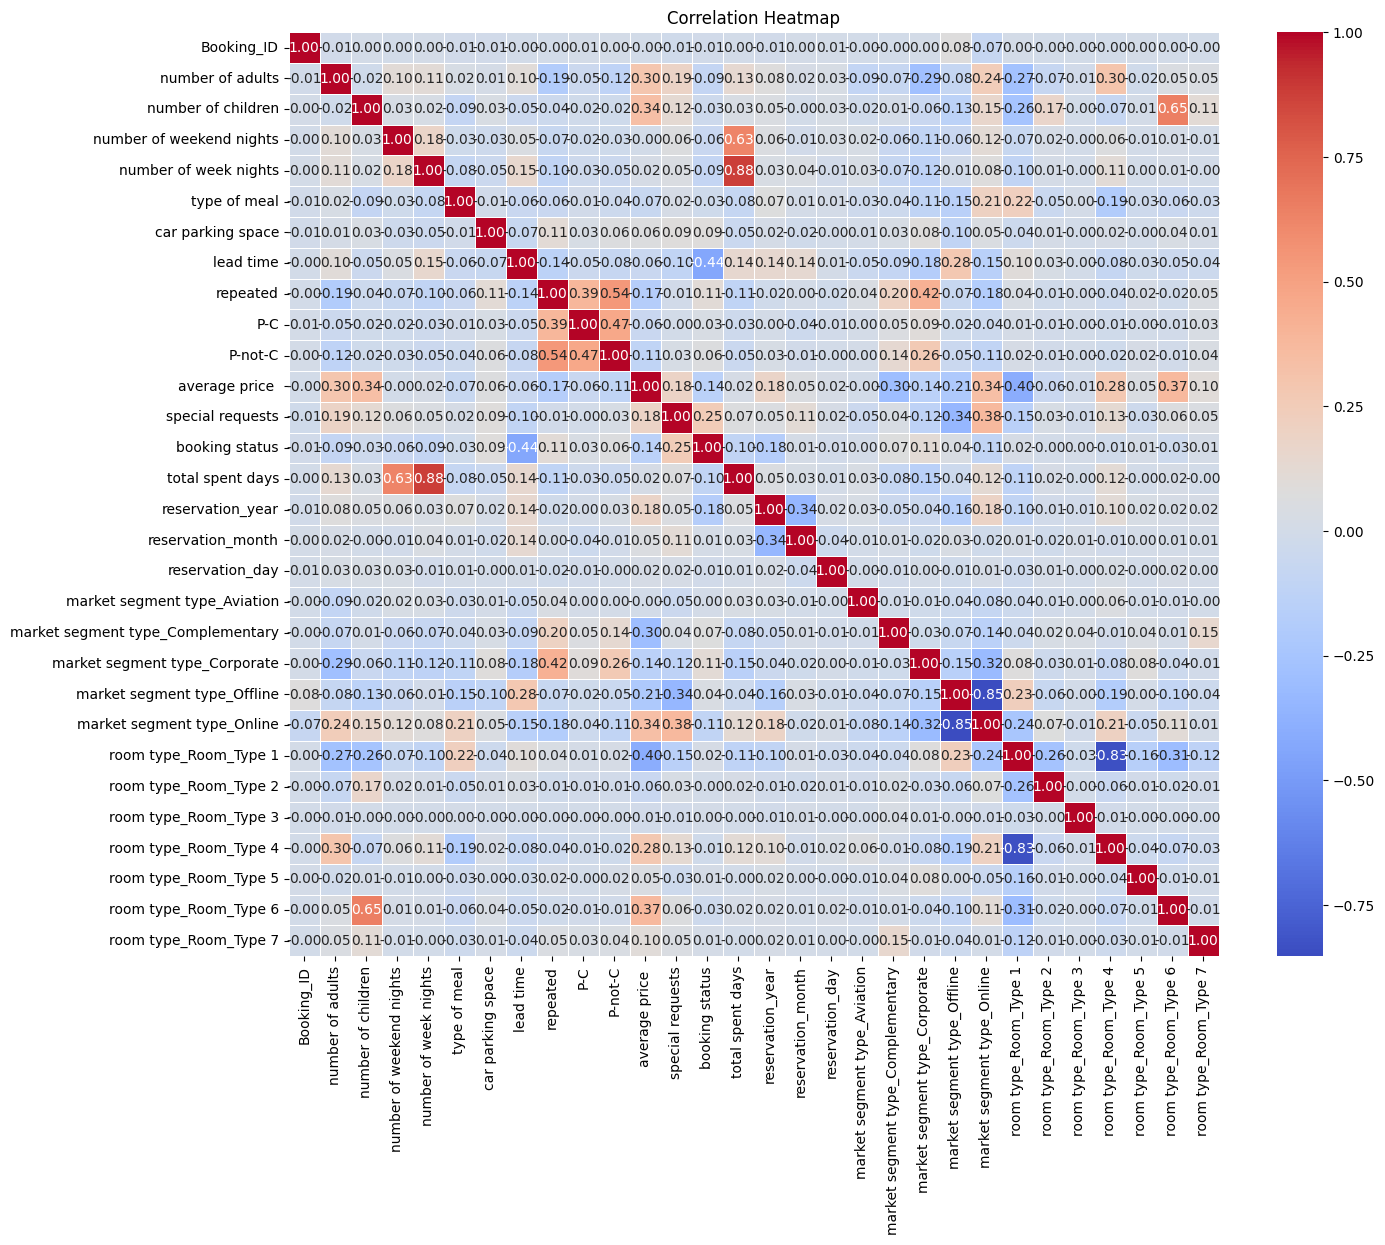

In [54]:
correlation_matrix = data.corr()


plt.figure(figsize=(15, 12))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [55]:
k = 5

X = data.drop(columns=['booking status']) # kda fasalt el target column mn el ba2e
y = data['booking status']

selector = SelectKBest(score_func=f_classif, k=k) #intialize bel scoring function

X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True) # index of features elle ekhtarnahom

selected_features = X.columns[selected_indices]# name of elfeatures

print("Selected Features:",selected_features)

Selected Features: Index(['lead time', 'average price ', 'special requests', 'reservation_year',
       'market segment type_Corporate'],
      dtype='object')


el columns de mesh 3agbane

In [56]:
data.drop(columns=['Booking_ID'], inplace=True)
data.drop(columns=['repeated'], inplace=True)
data.drop(columns=['P-C'], inplace=True)
data.drop(columns=['P-not-C'], inplace=True)
data.drop(columns=['car parking space'], inplace=True)
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,lead time,average price,special requests,booking status,total spent days,...,market segment type_Corporate,market segment type_Offline,market segment type_Online,room type_Room_Type 1,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7
12027,2,0,0,0,0,18,0.00,1,1,0,...,0,0,1,1,0,0,0,0,0,0
20266,1,0,0,0,0,119,0.00,0,1,0,...,0,0,1,1,0,0,0,0,0,0
18204,1,0,0,0,0,83,0.00,1,1,0,...,0,0,0,1,0,0,0,0,0,0
27179,2,0,0,0,3,11,0.00,1,1,0,...,0,0,1,1,0,0,0,0,0,0
32704,1,0,0,0,0,83,0.00,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,1,0,6,16,0,31,98.93,1,0,22,...,0,0,1,0,0,0,1,0,0,0
34092,2,0,6,16,3,14,64.05,0,0,22,...,0,0,1,1,0,0,0,0,0,0
16977,1,0,6,17,0,9,68.23,1,1,23,...,0,0,1,1,0,0,0,0,0,0
33019,1,0,6,17,0,2,170.00,0,0,23,...,1,0,0,0,0,0,0,1,0,0


edene feloutliers

<Axes: >

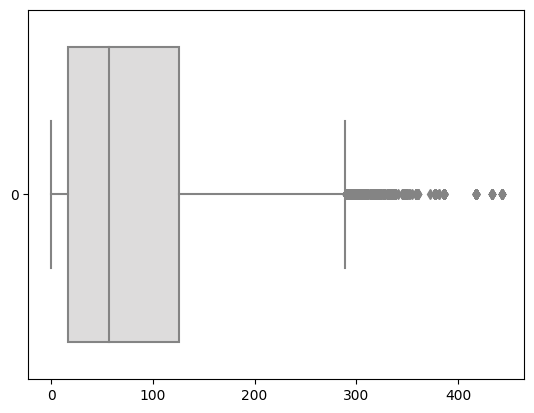

In [57]:
sns.boxplot(data=data['lead time'],palette='coolwarm',orient='h')

<Axes: >

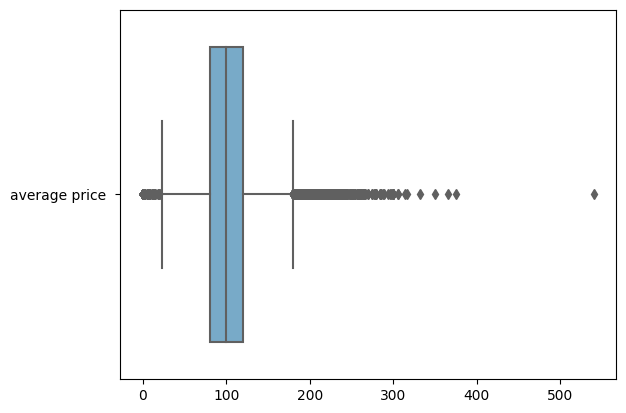

In [58]:
sns.boxplot(data=data[['average price ']], palette='Blues', orient='h')

In [59]:
q1 = data['lead time'].quantile(0.25)
q3 = data['lead time'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['lead time'] >= lower_bound) & (data['lead time'] <= upper_bound)]

In [60]:
q1 = data['average price '].quantile(0.25)
q3 = data['average price '].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['average price '] >= lower_bound) & (data['average price '] <= upper_bound)]

train w test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)